In [ ]:
# - generate artificial data using sklearn
# - visualize using plotnine (scatter plot)
# - fit KNN algorithm for various K (n_neighbors)

In [ ]:
! pip install plotnine

In [1]:
from sklearn import datasets
from sklearn import neighbors, tree
import numpy as np
import pandas as pd
from plotnine import *

# Obtain data

In [2]:
#from sklearn.datasets import load_iris

In [4]:
np.random.seed(1337)
X, y = datasets.make_blobs(centers=[[3, 5], [-2, 5], [1, 2]])

#X = load_iris().data[:,:2]
#y = load_iris().target

In [5]:
df = pd.DataFrame(X, columns=["a", "b"])
df["target"] = pd.Categorical(y)

In [6]:
df.head()

,a,b,target
0,-1.234252,3.899338,1
1,3.471557,4.991253,0
2,0.561664,3.221981,2
3,0.496908,2.144864,2
4,3.978223,3.782628,0


# Visualize data

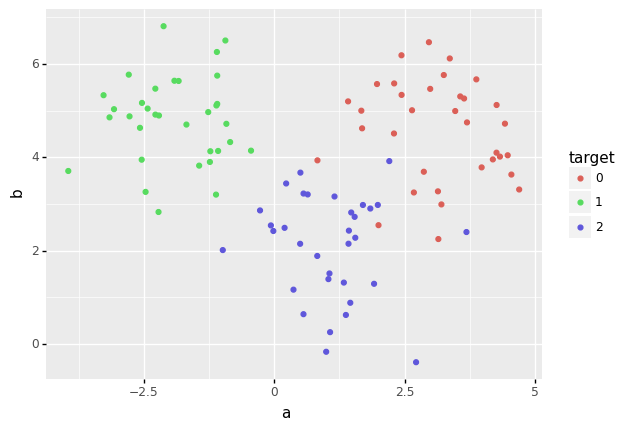

<ggplot: (17592010090987)>

In [7]:
ggplot(df, aes('a', 'b', color='target')) +\
geom_point()

# Train classifier

In [8]:
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

# Visualize decision boundary

### Create grid

In [10]:
xx, yy = np.meshgrid(np.linspace(-10, 10, 101), 
                     np.linspace(-10, 10, 101))

grid = pd.DataFrame({
    "a": xx.ravel(),
    "b": yy.ravel()
})

In [11]:
grid

,a,b
0,-10.0,-10.0
1,-9.8,-10.0
2,-9.6,-10.0
3,-9.4,-10.0
4,-9.2,-10.0
...,...,...
10196,9.2,10.0
10197,9.4,10.0
10198,9.6,10.0
10199,9.8,10.0


### Use all points on the grid as test data points

In [12]:
grid["target"] = pd.Categorical(knn.predict(grid[["a","b"]].values))

In [13]:
grid.head()

,a,b,target
0,-10.0,-10.0,2
1,-9.8,-10.0,2
2,-9.6,-10.0,2
3,-9.4,-10.0,2
4,-9.2,-10.0,2


### Use plotnine 

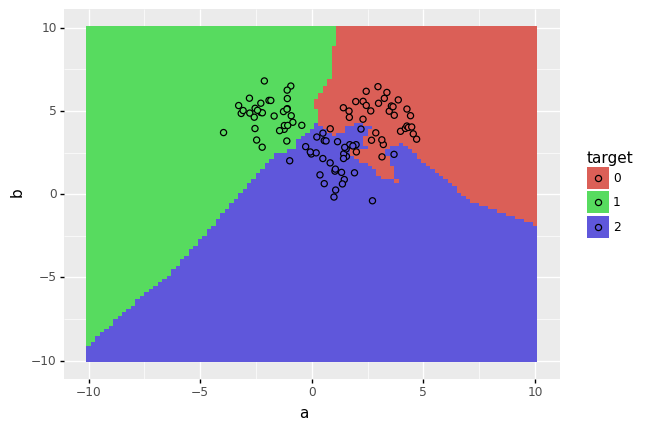

<ggplot: (17592051942425)>

In [14]:
ggplot(aes('a' ,'b', fill='target')) +\
geom_tile(data=grid) +\
geom_point(data=df, color='black', shape='o', size=2)

## Again, but then for DecisionTree

In [31]:
from sklearn import svm, ensemble

In [34]:
#clf = tree.DecisionTreeClassifier(max_depth=10)
#clf = neighbors.KNeighborsClassifier(n_neighbors=11)
clf = ensemble.RandomForestClassifier(n_estimators=100, max_features=2)
#clf = svm.SVC()
clf.fit(X, y)
grid["target"] = pd.Categorical(clf.predict(grid[["a","b"]].values))

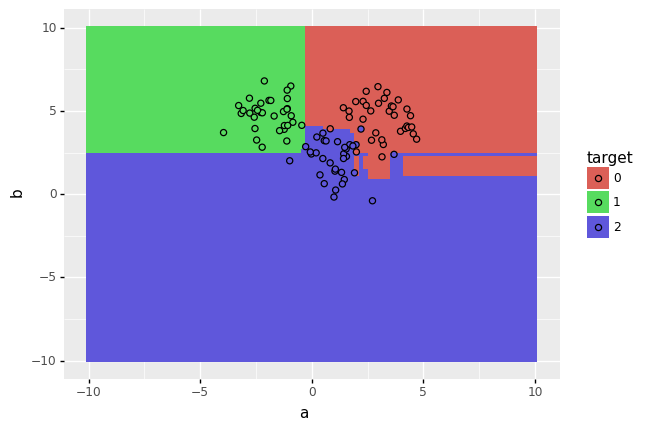

<ggplot: (17592003560042)>

In [35]:
ggplot(df, aes('a' ,'b', fill='target')) +\
geom_tile(data=grid) +\
geom_point(color='black', shape='o', size=2)